In [56]:
pip install igraph


     ---------------------------------------- 2.8/2.8 MB 11.9 MB/s eta 0:00:00
  Using cached texttable-1.6.4-py2.py3-none-any.whl (10 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install louvain


  Using cached louvain-0.7.1-cp39-cp39-win_amd64.whl (94 kB)


You should consider upgrading via the 'C:\Users\KKo1\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
from numpy import linalg as la
from scipy.sparse import issparse
import loompy
import anndata
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.4 (python 3.9.12) on 2023-04-20 15:30.


In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80,dpi_save=300, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.3 scipy==1.8.1 pandas==1.4.2 scikit-learn==1.2.2 statsmodels==0.13.2 python-igraph==0.10.4 louvain==0.7.1 pynndescent==0.5.6


In [3]:
import os
os.chdir('F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4')

In [4]:
import scanpy.external as sce

# T cell dataset

In [5]:
adata_T = sc.read('T_cell_from_Group_ABC_patients_immune_after_harmony.h5ad')

In [6]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'T_1': ['P010','P008','P021','P049','P020','P062','P032','P016','P061','P012',
                     'P057','P015','P065','P063','P130','P056', 'P011','P127','P126','P001',
                     'P028','P027','P030'],
             'T_2': ['P037','P031','P026','P042','P019','P017','P036','P054','P023','P128',
                     'P048','P002','P104','P087','P094','P084','P079','P107','P076','P089',
                     'P083'],
                     
                   
             'T_3': [ 'P986','P658','P836','P866','P846','P686','P865','P585','P944','P787'],
             'T_4': ['P052','P024','P040','P039','P080','P075','P091','P009B','P082','P022',
                     'P074','P047','P038','P044','P009A']
              }

# Initialize empty column in cell metadata
adata_T.obs['T_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'T_patient_cluster4'] = i


In [7]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Myeloid_1': ['P063','P056','P009B','P075','P011','P032','P016','P104','P087','P089','P036','P083','P052',
                          'P047','P037','P091','P022','P074','P038','P082'],
            'Myeloid_2':  ['P130','P010','P986','P865','P585','P866','P846','P686','P658','P944','P836','P787'],
             'Myeloid_3': ['P040','P024','P017','P031','P026','P023','P049','P021','P107','P076','P079','P048','P062',
                          'P027','P065','P057','P008','P044','P001','P042','P094','P084','P080','P002','P061','P015'],
             'Myeloid_4': ['P128','P054','P019','P127','P126','P030','P028','P039','P020','P012']
              }

# Initialize empty column in cell metadata
adata_T.obs['Myeloid_patient_cluster4'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'Myeloid_patient_cluster4'] = i


In [8]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'M1toT1': ["P011",	"P016",	"P032",	"P056",	"P063",],
             'M1toT2': ["P036",	"P037",	"P083",	"P087",	"P089",	"P104",],
             'M1toT3': [],
             'M1toT4': ["P009B",	"P022",	"P038",	"P047",	"P052",	"P074",	"P075",	"P082",	"P091",],
             'M2toT1': ["P010",	"P130",],
             'M2toT2': [],
             'M2toT3': ["P585",	"P658",	"P686",	"P787",	"P836",	"P846",	"P865",	"P866",	"P944",	"P986",],
             'M2toT4': [],
             'M3toT1': ["P001",	"P008",	"P015",	"P021",	"P027",	"P049",	"P057",	"P061",	"P062",	"P065",],
             'M3toT2': ["P002",	"P017",	"P023",	"P026",	"P031",	"P042",	"P048",	"P076",	"P079",	"P084",	"P094",	"P107",],
             'M3toT3': [],
             'M3toT4': ["P024",	"P040",	"P044",	"P080",],
             'M4toT1': ["P012",	"P020",	"P028",	"P030",	"P126",	"P127",],
             'M4toT2': ["P019",	"P054",	"P128",],
             'M4toT3': [],
             'M4toT4': ["P039",],
             'NoMtoT4': ["P009A",]
            }

# Initialize empty column in cell metadata
adata_T.obs['Myeloid_to_T_cluster44'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'Myeloid_to_T_cluster44'] = i


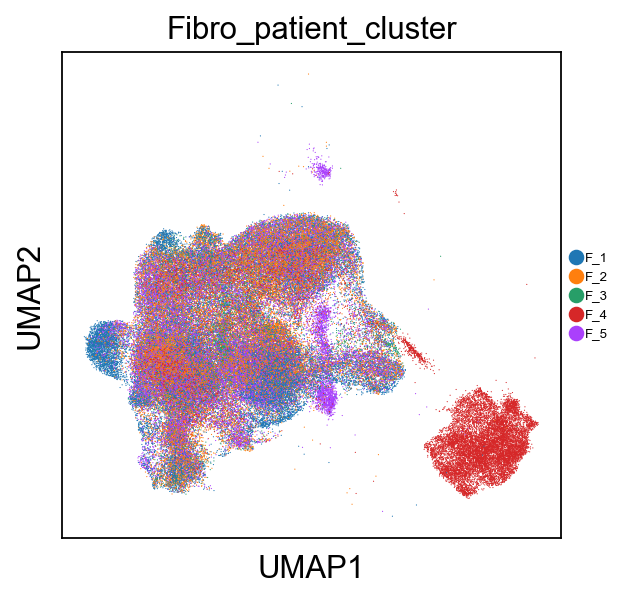

In [9]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'F_1': ['P083','P032','P107','P024','P036','P074','P089','P038','P019','P128','P082','P130','P015',
                          'P022','P030','P079'],
             'F_2': ['P054','P062','P027','P061','P048','P052','P042','P023','P084','P127','P012','P028','P039','P026',
                          'P063','P017','P040','P021','P049','P021','P049'],
             'F_3': ['P020','P080','P126','P002','P016'],
             'F_4':['P001','P037','P031','P787','P944','P051','P866','P181','P686','P846','P658','P986','P585'],
             'F_5':['P094','P065','P008','P087','P009A','P057','P104','P075','P076','P011','P056','P047','P044','P091','P010','P009B']
              }

# Initialize empty column in cell metadata
adata_T.obs['Fibro_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'Fibro_patient_cluster'] = i

sc.pl.umap(adata_T, color=['Fibro_patient_cluster'], legend_loc='right margin', legend_fontsize=6)#, save='umap_Fibro_patient_cluster_in_Fibroblast.pdf')


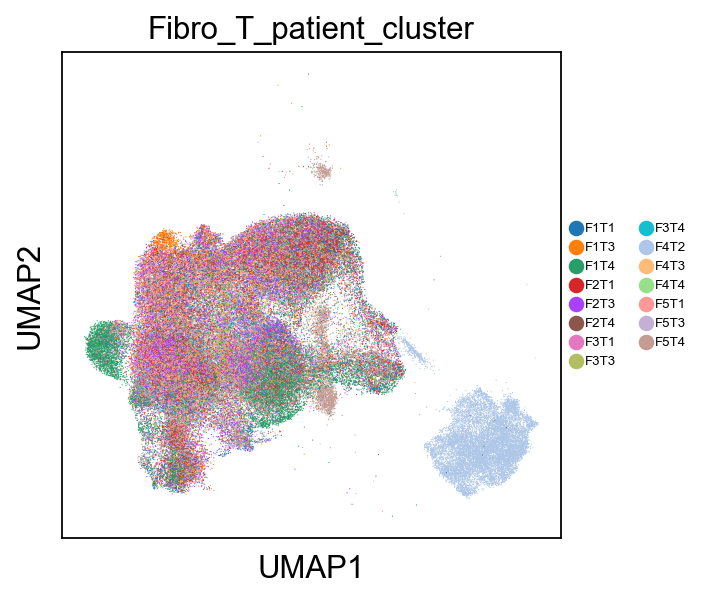

In [10]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'F1T1': ['P036','P079','P083','P089','P107','P019','P032'],
             'F1T2':[],
             'F1T3':['P128','P015','P030','P130'],
             'F1T4':['P022','P028','P038','P082','P074','P024'],
            
             'F2T1': ['P054','P017','P021','P023','P084'],
            'F2T2': [],
             'F2T3':['P063','P012','P027','P028','P048','P062','P127','P049','P061'],
             'F2T4':['P040','P026','P039','P052','P042'],
 
             'F3T1': ['P016'],
             'F3T2':[],
             'F3T3':['P020','P126','P002',],
             'F3T4':['P080'],
             
             'F4T1':[],
             'F4T2':['P787','P944','P051','P866','P181','P686','P846','P658','P986','P585'],
             'F4T3':['P001'],
             'F4T4':['P037','P031'],
             
            'F5T1':['P087','P104','P076','P008','P010','P094'],
             'F5T2':[],
             'F5T3':['P056','P057','P065'],
             'F5T4':['P009A','P044','P047','P009B','P011','P075','P091']
             
              }

# Initialize empty column in cell metadata
adata_T.obs['Fibro_patient_cluster'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T.obs.patient).isin(cell_dict[i])
    adata_T.obs.loc[ind,'Fibro_T_patient_cluster'] = i

sc.pl.umap(adata_T, color=['Fibro_T_patient_cluster'], legend_loc='right margin', legend_fontsize=6)#, save='umap_Fibro_T_patient_cluster_in_Fibroblast.pdf')


In [9]:
adata_T.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,n_counts,celltype,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44
AAACCTGAGTAGCCGA-1-0-0,3934.0,3879,1452.073242,18.802568,1.294877,tumor,P686,6,0,198.197769,...,1452.073242,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGCAAGAGGCT-1-0-0,674.0,669,882.995728,11.229170,1.271713,tumor,P686,6,0,213.666718,...,882.995728,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGCAGTATCTG-1-0-0,1014.0,1003,956.411804,18.788149,1.964441,tumor,P686,6,0,221.148575,...,956.411804,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGGTGCCTGGT-1-0-0,896.0,885,1091.559448,17.238060,1.579214,tumor,P686,6,0,176.360626,...,1091.559448,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
AAACCTGGTGCGCTTG-1-0-0,786.0,772,876.556519,18.123993,2.067635,tumor,P686,6,0,217.813019,...,876.556519,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGCAAATCA-1-24-2,1375.0,1351,1476.700806,22.369625,1.514838,tumor,P001,1,2,184.743835,...,1476.700806,1,T cell,effector T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1
TTTGGTTAGTGGTAAT-1-24-2,1606.0,1573,1480.355835,29.242380,1.975362,tumor,P001,4,2,188.684555,...,1480.355835,4,T cell,CD4 T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1
TTTGGTTCAAGCCATT-1-24-2,4456.0,4328,1867.209229,29.546848,1.582407,tumor,P001,0,2,172.502136,...,1867.209229,0,T cell,CD4 T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1
TTTGTCAGTCCTCTTG-1-24-2,2711.0,2644,1972.602417,24.433256,1.238631,tumor,P001,10,2,120.637726,...,1972.602417,10,T cell,exhausted T cell,Group A,Zhang dataset,NaN,T_1,Myeloid_3,M3toT1


In [10]:
adata_T3 = adata_T[adata_T.obs['T_patient_cluster4']=='T_3']

In [11]:
sc.pp.neighbors(adata_T3, n_neighbors=10, n_pcs=10)
sc.tl.leiden(adata_T3)
sc.tl.umap(adata_T3)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:23)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


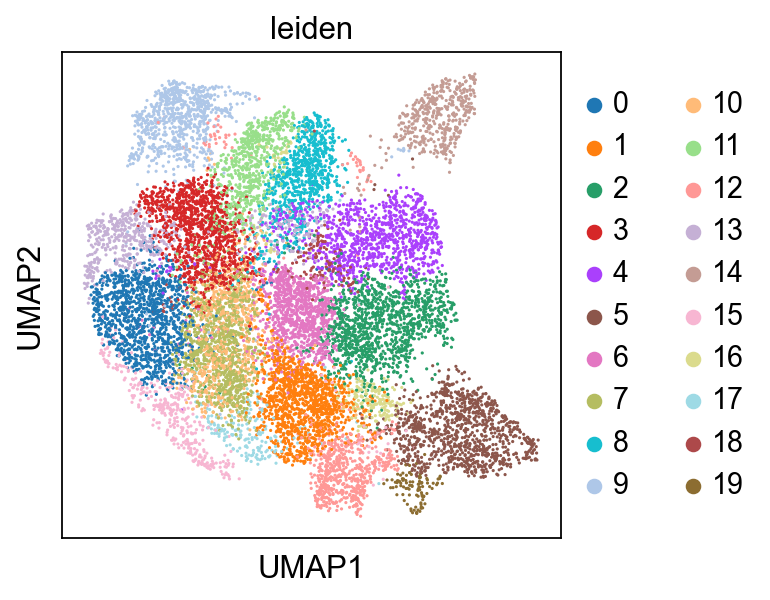

In [12]:
sc.pl.umap(adata_T3, color=['leiden'], save='T3_T_cell_leiden.pdf')

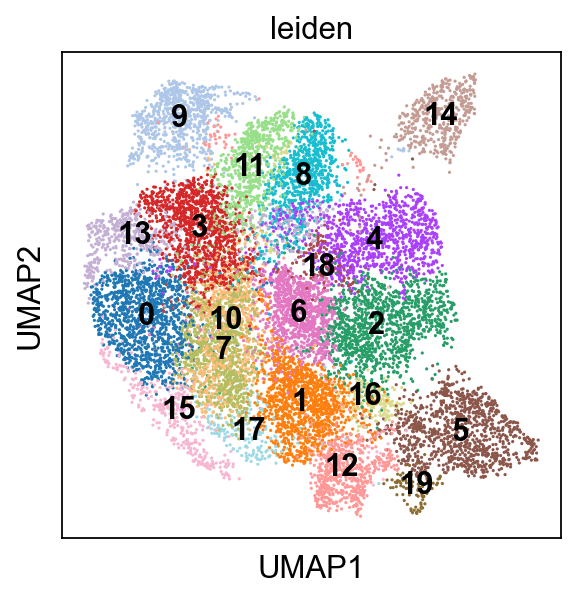

In [13]:
sc.pl.umap(adata_T3, color=['leiden'],legend_loc='on data', save='T3_T_cell_leiden_ondata.pdf' )

ranking genes
    finished: added to `.uns['leiden_rank']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:35)


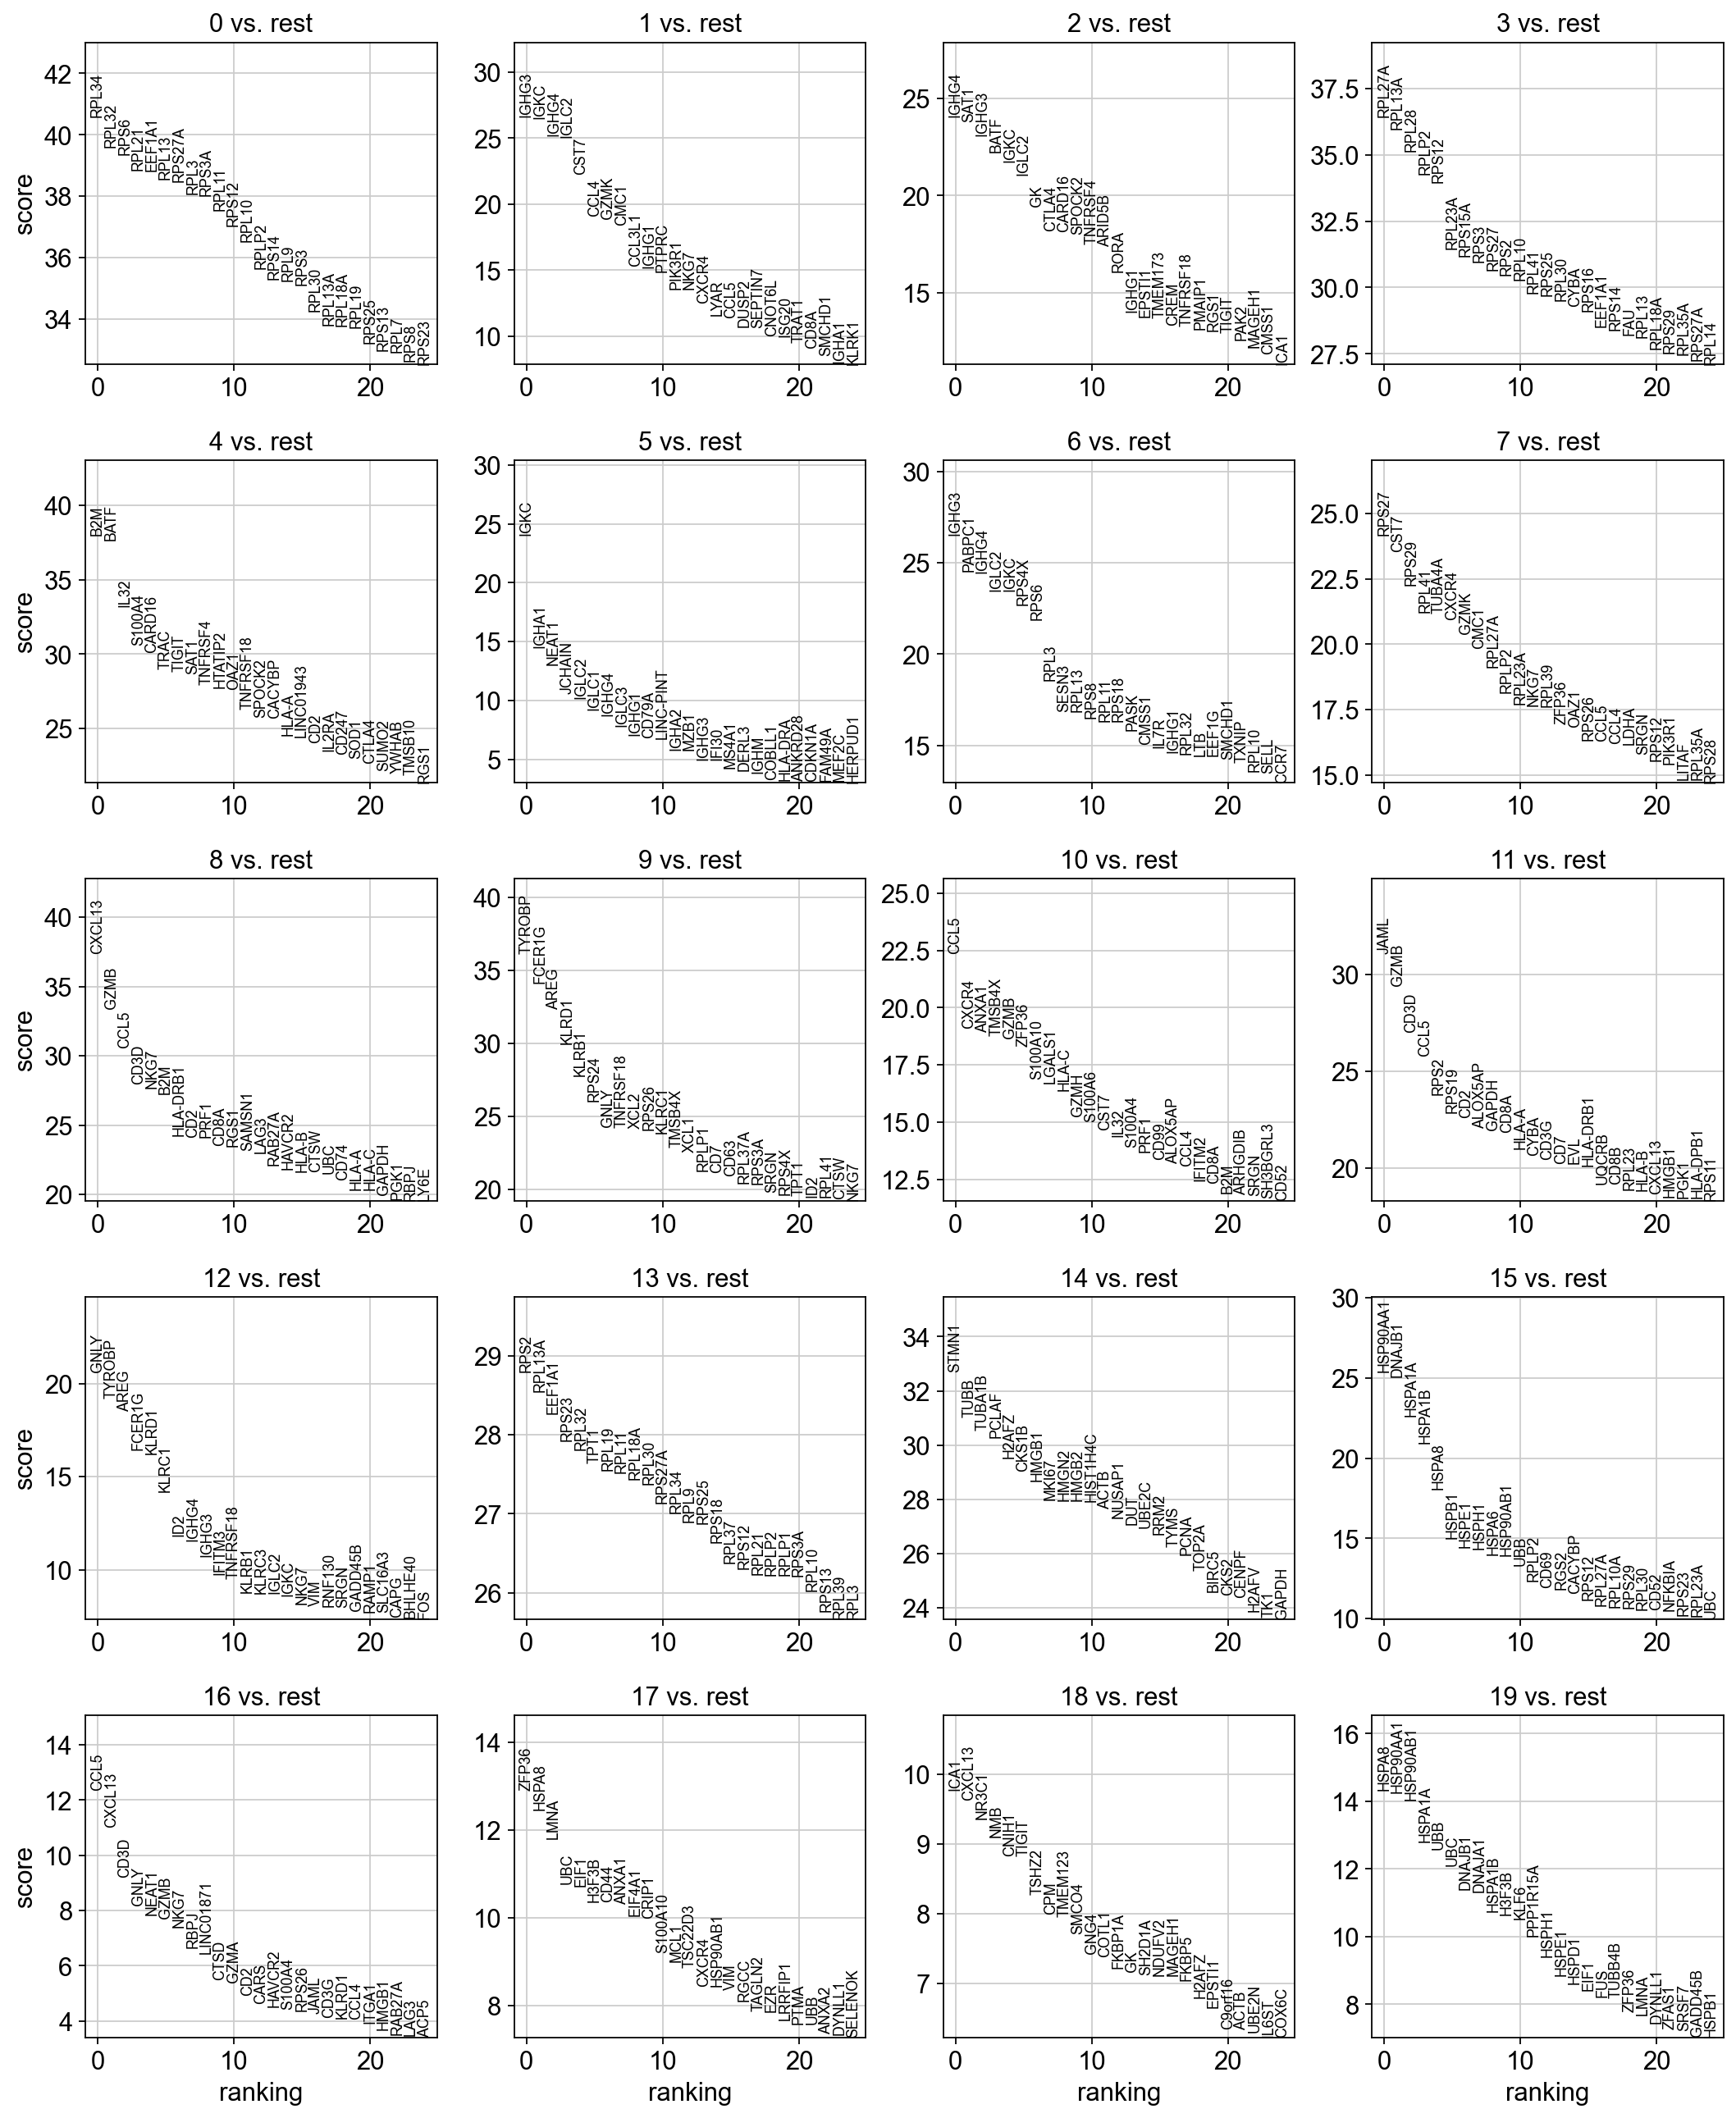

In [14]:
sc.tl.rank_genes_groups(adata_T3, 'leiden', method='wilcoxon', key_added = "leiden_rank")
sc.pl.rank_genes_groups(adata_T3, n_genes=25, sharey=False, key = "leiden_rank")

In [15]:
df=pd.DataFrame(adata_T3.uns['leiden_rank']['names'])
df.to_csv("F:/Ko/67ESCC_PCN_integration_07-19-22/immune_cell_T4_M4/T3_cluster_detail_T_Cell.csv",
                 sep=',', na_rep='', float_format=None, columns=None, header=True, 
                 index=True, index_label=None, mode='w', encoding=None, compression='infer', 
                 quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None)

In [ ]:
# Frontiers in immunology, 2018 ['Defining Memory CD8 T cell']
#central memory, Tcm:    CCR7(high), CD62L(high), CD27(high),
#effector memory, Tem:   CCR7(low), CD62L(low), CD27(low),
#peripheral memory, Tpm: CCR7(+/-), CD62L(+/-), CD27(high)

# Annual rev. immunology 2004 ['Central memory and effector memory T cell subsets: function, generation, and maintenance']
# Temra: CCR7(low), CD62L(low), CD27(+/-),CD28(+/-),CXCR3(high),CCR5(high)


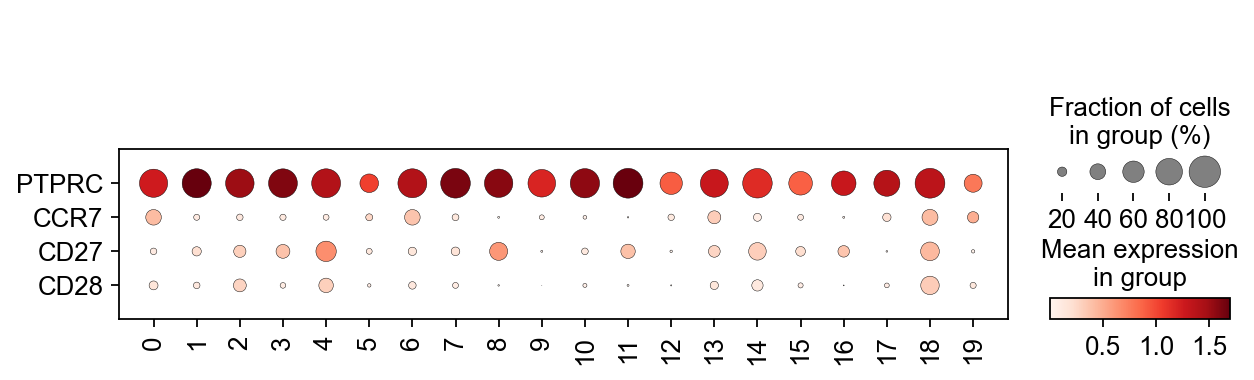

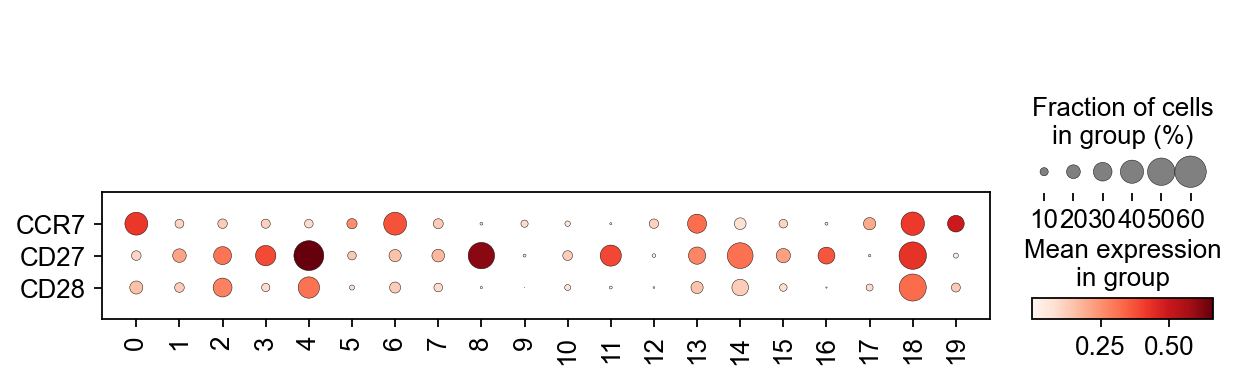

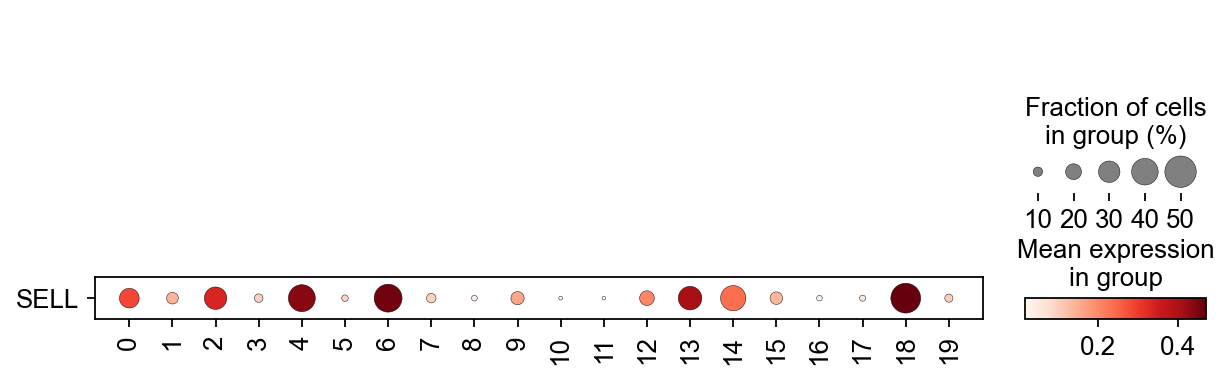

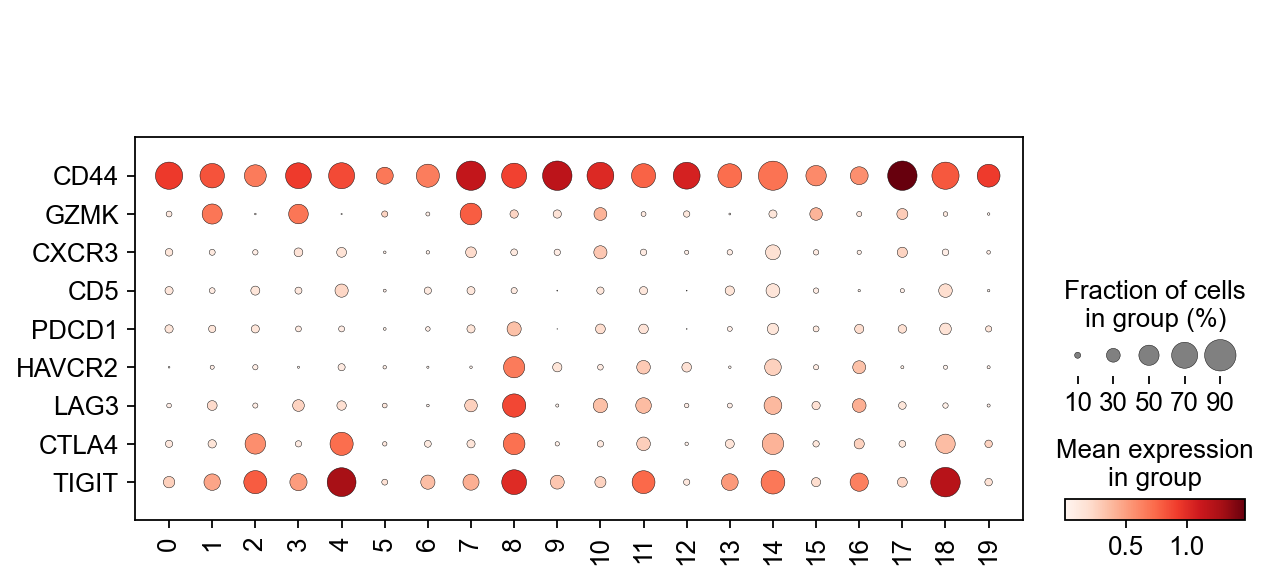

In [16]:
sc.pl.dotplot(adata_T3, ["PTPRC",	"CCR7",	"CD27",	"CD28"
], groupby=['leiden'], use_raw=True, swap_axes=True)

sc.pl.dotplot(adata_T3, ["CCR7",	"CD27",	"CD28",#'CCR5'
], groupby=['leiden'], use_raw=True, swap_axes=True)

#CD62L
sc.pl.dotplot(adata_T3, ['SELL'
], groupby=['leiden'], use_raw=True, swap_axes=True)

sc.pl.dotplot(adata_T3, ['CD44','GZMK',"CXCR3","CD5",'PDCD1',"HAVCR2",'LAG3','CTLA4','TIGIT'
], groupby=['leiden'], use_raw=True, swap_axes=True)

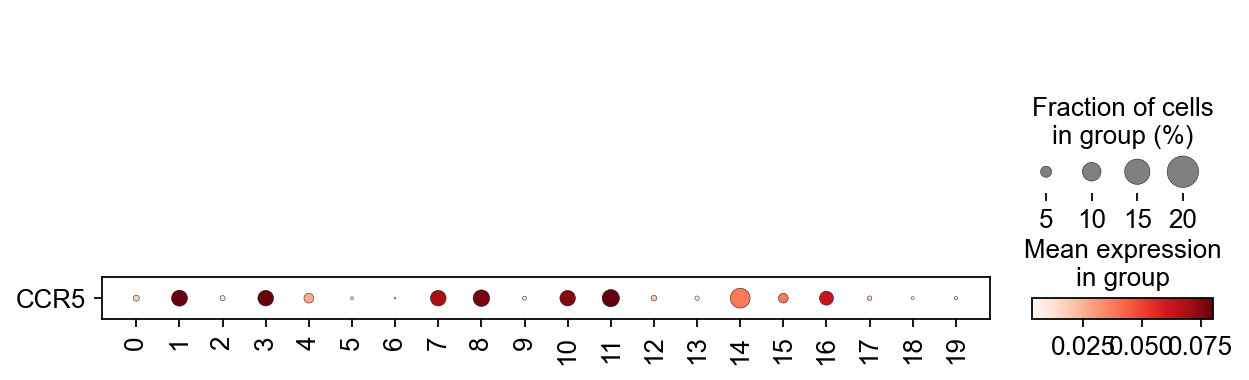

In [17]:
sc.pl.dotplot(adata_T3, ['CCR5'], groupby=['leiden'], use_raw=True, swap_axes=True)

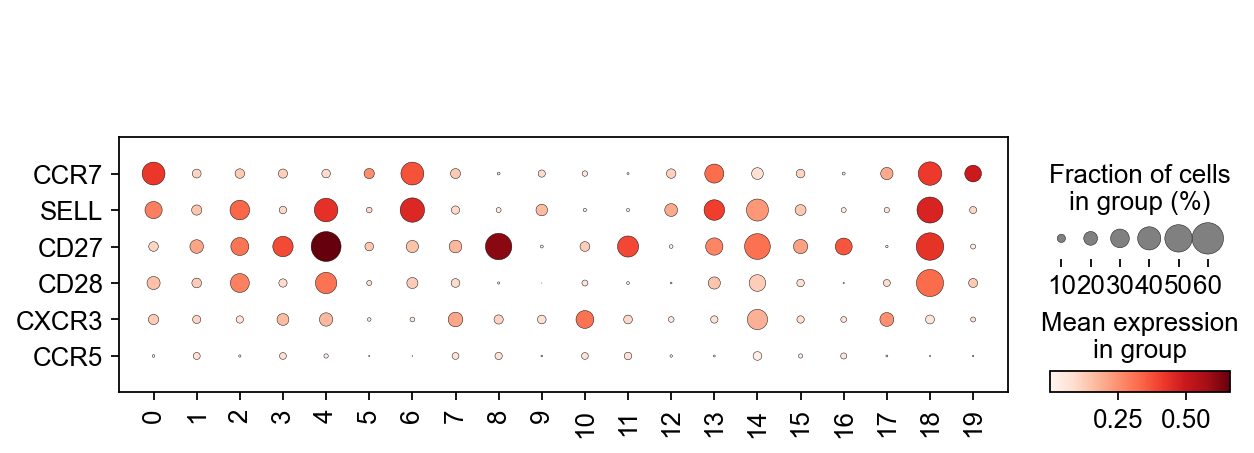

In [20]:
sc.pl.dotplot(adata_T3, ['CCR7','SELL','CD27','CD28','CXCR3','CCR5'], groupby=['leiden'], use_raw=True, swap_axes=True)

# Check

In [21]:
# Frontiers in immunology, 2018 ['Defining Memory CD8 T cell']
#central memory, Tcm:    CCR7(high), CD62L(high), CD27(high),
#effector memory, Tem:   CCR7(low), CD62L(low), CD27(low),
#peripheral memory, Tpm: CCR7(+/-), CD62L(+/-), CD27(high)

# Annual rev. immunology 2004 ['Central memory and effector memory T cell subsets: function, generation, and maintenance']
# Temra: CCR7(low), CD62L(low), CD27(+/-),CD28(+/-),CXCR3(high),CCR5(high)

#Tcm: 0,                              13,         18,19
#Tem:   1,      5,6,7,  9,      12,      15,   17 
#Temra                     10
#Tpm:     2,3,4,      8,      11,      14,   16,



In [46]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Tcm': ['0','13','18','19'],
             'Tpm':['2','3','4','8','11','14','16'],
             'Tem-early':['1','5','6','7','9','12','15','17'],
             'Tem-late':['10']
             
           
            }

# Initialize empty column in cell metadata
adata_T3.obs['Tcell_subset'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T3.obs.leiden).isin(cell_dict[i])
    adata_T3.obs.loc[ind,'Tcell_subset'] = i


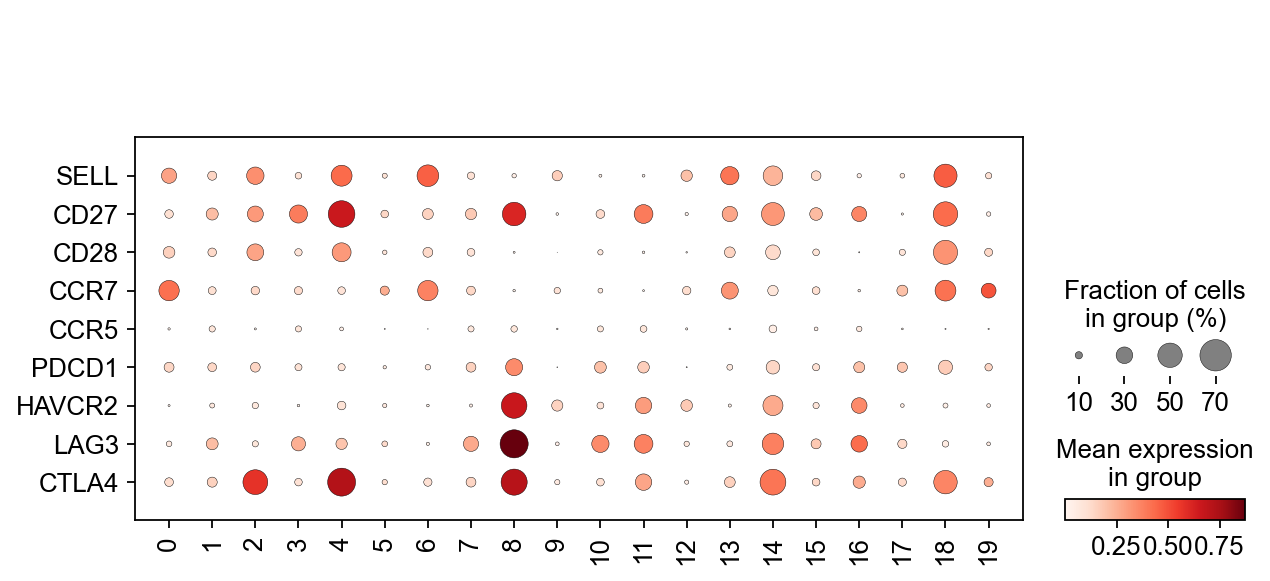

In [47]:
sc.pl.dotplot(adata_T3, ['SELL','CD27','CD28','CCR7',
                         'CCR5',
                         #'CD44',
                         'PDCD1',"HAVCR2",'LAG3','CTLA4'
], groupby=['leiden'], use_raw=True, swap_axes=True)

In [48]:
adata_T3.obs['Tcell_subset'].cat.reorder_categories(['Tcm','Tpm','Tem-early','Tem-late'],inplace=True)
adata_T3.obs['Tcell_subset']

AAACCTGAGTAGCCGA-1-0-0          Tpm
AAACCTGCAAGAGGCT-1-0-0          Tcm
AAACCTGCAGTATCTG-1-0-0          Tcm
AAACCTGGTGCCTGGT-1-0-0          Tpm
AAACCTGGTGCGCTTG-1-0-0          Tcm
                            ...    
TTTATGCCATATACCG-1-2-1          Tpm
TTTATGCGTCTCCACT-1-2-1    Tem-early
TTTGGTTTCCAAAGTC-1-2-1          Tpm
TTTGGTTTCGTCTGAA-1-2-1    Tem-early
TTTGTCAGTCGACTGC-1-2-1    Tem-early
Name: Tcell_subset, Length: 14627, dtype: category
Categories (4, object): ['Tcm', 'Tpm', 'Tem-early', 'Tem-late']

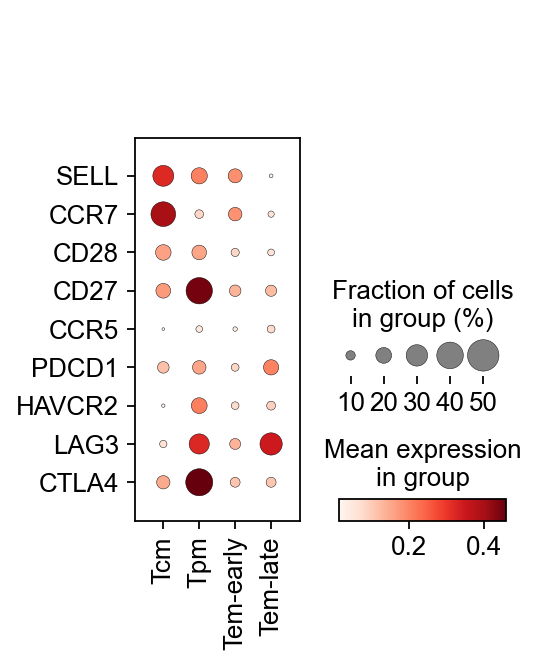

In [49]:
sc.pl.dotplot(adata_T3, ['SELL','CCR7','CD28','CD27',
                         'CCR5',
                         #'CD44',
                         'PDCD1',"HAVCR2",'LAG3','CTLA4'
], groupby=['Tcell_subset'], use_raw=True, swap_axes=True)

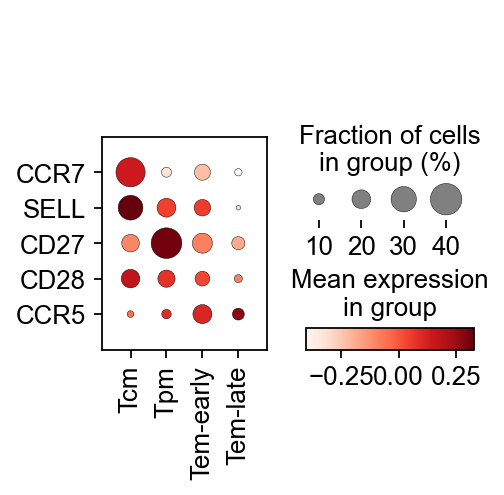

In [50]:
sc.pl.dotplot(adata_T3, ['CCR7','SELL','CD27','CD28',
                         'CCR5',
                      
], groupby=['Tcell_subset'], use_raw=False, swap_axes=True, save='T_cell_subset_in_T3_T_cell.pdf')

In [51]:
adata_T3.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,tissue,patient,leiden,batch,total_counts_ribo,...,celltype,crude,celltype_detail,patient_cluster,dataset,T_patient_cluster,T_patient_cluster4,Myeloid_patient_cluster4,Myeloid_to_T_cluster44,Tcell_subset
AAACCTGAGTAGCCGA-1-0-0,3934.0,3879,1452.073242,18.802568,1.294877,tumor,P686,14,0,198.197769,...,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tpm
AAACCTGCAAGAGGCT-1-0-0,674.0,669,882.995728,11.229170,1.271713,tumor,P686,0,0,213.666718,...,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tcm
AAACCTGCAGTATCTG-1-0-0,1014.0,1003,956.411804,18.788149,1.964441,tumor,P686,13,0,221.148575,...,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tcm
AAACCTGGTGCCTGGT-1-0-0,896.0,885,1091.559448,17.238060,1.579214,tumor,P686,8,0,176.360626,...,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tpm
AAACCTGGTGCGCTTG-1-0-0,786.0,772,876.556519,18.123993,2.067635,tumor,P686,0,0,217.813019,...,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tcm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTATGCCATATACCG-1-2-1,1123.0,1106,1302.109253,3.649094,0.280245,tumor,P846,3,1,203.516876,...,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tpm
TTTATGCGTCTCCACT-1-2-1,558.0,546,857.391785,30.830795,3.595882,tumor,P846,5,1,48.520164,...,19,T cell,T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tem-early
TTTGGTTTCCAAAGTC-1-2-1,1095.0,1081,1321.551270,24.926340,1.886142,tumor,P846,11,1,202.739059,...,6,T cell,CD8 T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tpm
TTTGGTTTCGTCTGAA-1-2-1,362.0,352,730.914978,36.648827,5.014102,tumor,P846,5,1,116.060013,...,19,T cell,T cell,Group A,Dinh dataset,NaN,T_3,Myeloid_2,M2toT3,Tem-early


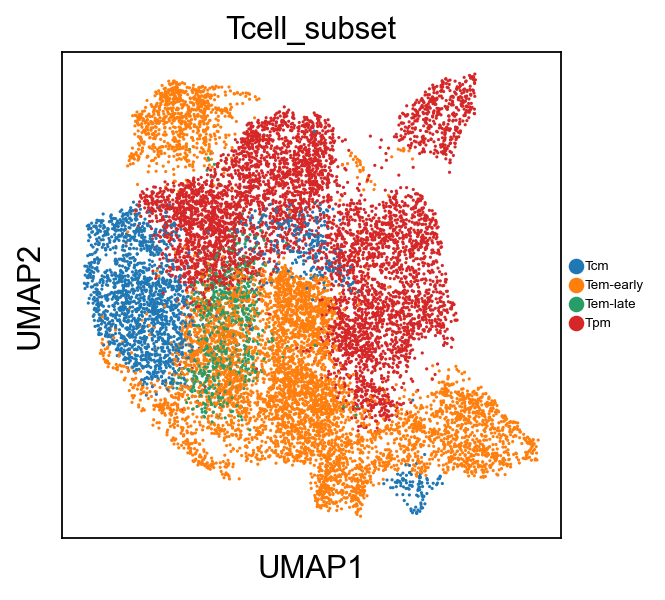

In [52]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'Tcm': ['0','13','18','19'],
             'Tpm':['2','3','4','8','11','14','16'],
             'Tem-early':['1','5','6','7','9','12','15','17'],
             'Tem-late':['10']
             
            }

# Initialize empty column in cell metadata
adata_T3.obs['Tcell_subset'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata_T3.obs.leiden).isin(cell_dict[i])
    adata_T3.obs.loc[ind,'Tcell_subset'] = i

sc.pl.umap(adata_T3, color=['Tcell_subset'], legend_loc='right margin', legend_fontsize=6, save='CD8_subset_in_T2_cells.pdf')


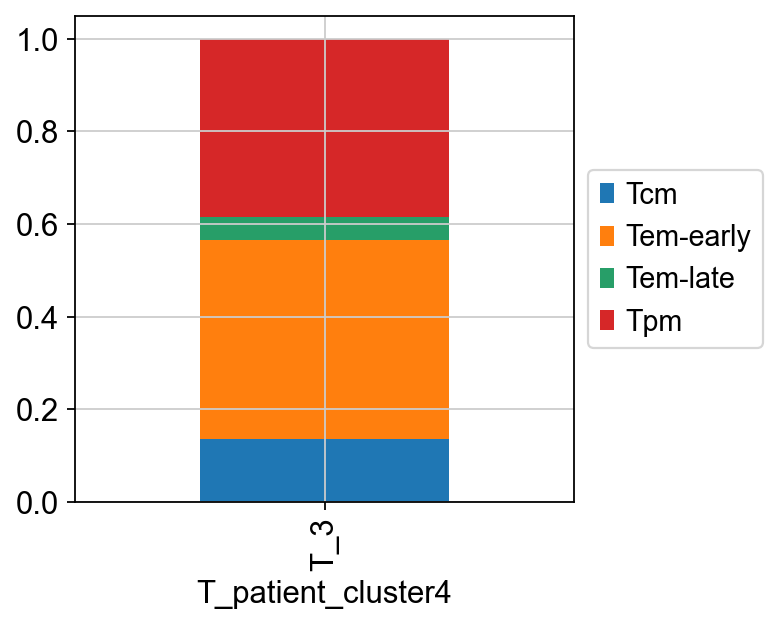

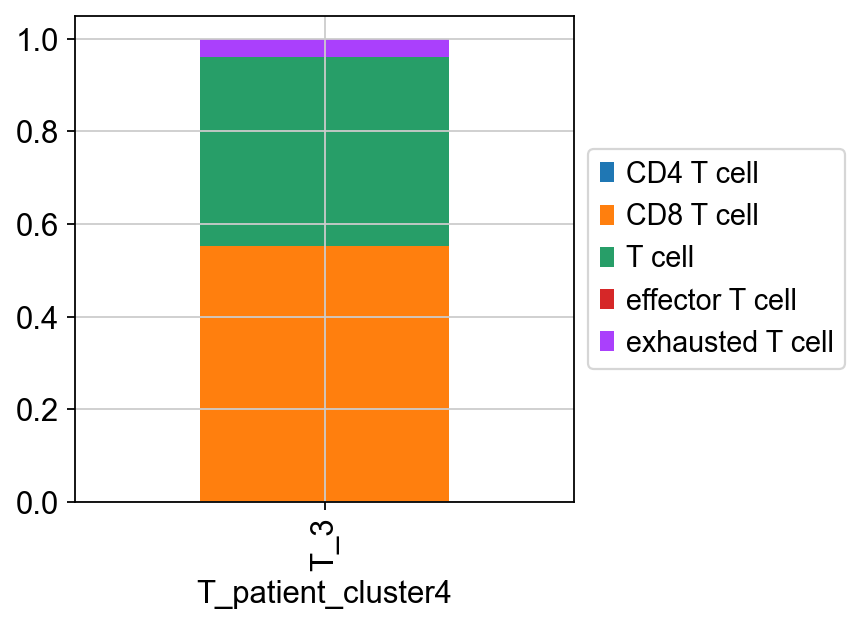

In [53]:
tmp = pd.crosstab(adata_T3.obs['T_patient_cluster4'],adata_T3.obs['Tcell_subset'], normalize='index')
tmp2 = pd.crosstab(adata_T3.obs['T_patient_cluster4'],adata_T3.obs['celltype_detail'], normalize='index')
ax = tmp.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).get_figure()
ax2 = tmp2.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)).get_figure()


ax.savefig('T3_cell_stacked_bar.pdf')
ax2.savefig('T3_cell_stacked_bar_celltype_detail.pdf')